In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Load the resumes
resumes = pd.read_csv('resumes.csv')
resumes.head()

,id,resume_str,category
0,16852973,hr administrator/marketing associate hr admini...,HR
1,22323967,"hr specialist, us hr operations summary versat...",HR
2,33176873,hr director summary over 20 years experience i...,HR
3,27018550,"hr specialist summary dedicated, driven, and d...",HR
4,17812897,hr manager skill highlights hr skills hr depar...,HR


In [15]:
# Load the jobs
jobs_gb_clean = pd.read_csv('jobs_gb_cleaned.csv')
jobs_gb_clean.head()

,id,title,company,location,category,created,description,salary_min,salary_max,contract_type,contract_time,salary_avg
0,5185229320,Early Years Educator Nursery,Partou,"Ware, Hertfordshire",Teaching Jobs,2025-05-07T14:32:36Z,"join partou, where we put children in the lead...",27600.0,27600.0,permanent,part_time,27600.0
1,5172986638,Housekeeping Assistant - Bank - Care Home,Barchester Healthcare,"Melbourn, Royston",Domestic help & Cleaning Jobs,2025-05-01T13:32:39Z,about the role as a bank housekeeping assistan...,29619.0,29619.0,unknown,unknown,29619.0
2,5190346944,Care Home Administrator,Barchester Healthcare,"Harlow Green, Gateshead",Admin Jobs,2025-05-09T13:37:28Z,barchester healthcare are looking for an exper...,28000.0,28000.0,permanent,unknown,28000.0
3,5149584869,Care Assistant - Bank - Care Home,Barchester Healthcare,"Wilton, Salisbury",Healthcare & Nursing Jobs,2025-04-17T13:30:03Z,about the role as a bank care assistant at a b...,33342.0,33342.0,unknown,unknown,33342.0
4,5172986642,Activities Assistant - Care Home,Barchester Healthcare,"Badgeworth, Cheltenham",Hospitality & Catering Jobs,2025-05-01T13:32:39Z,about the role as an activities assistant at a...,26436.0,26436.0,permanent,unknown,26436.0


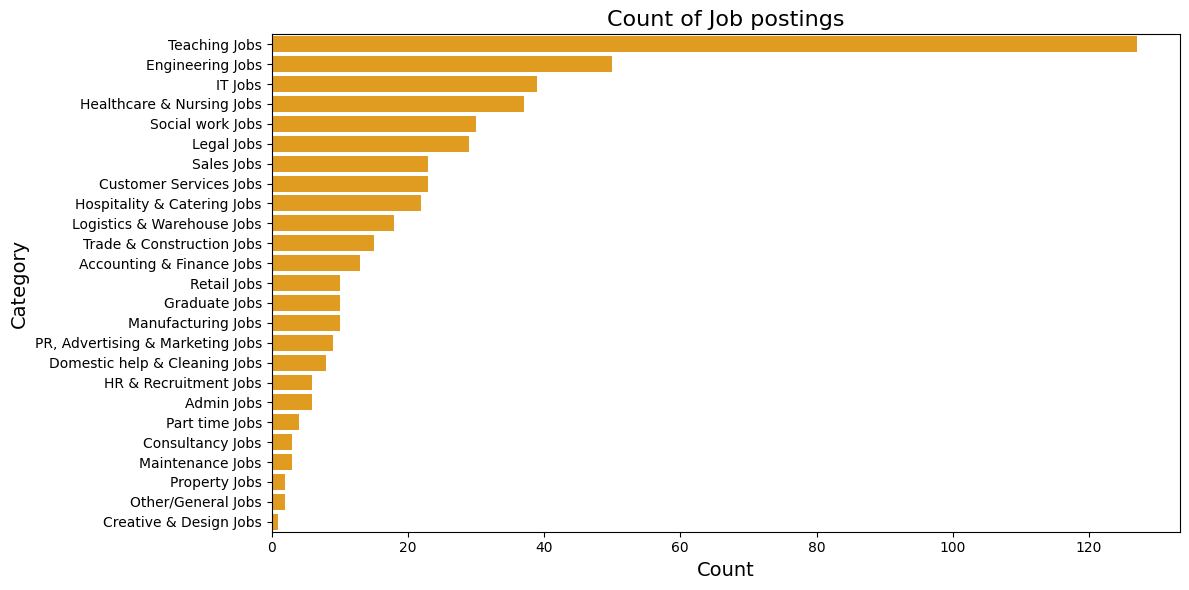

In [16]:
# Frequency of the most common job categories
plt.figure(figsize=(12,6))
sns.countplot(data=jobs_gb_clean, y='category', order=jobs_gb_clean['category'].value_counts().index, color='Orange')
plt.title('Count of Job postings', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.tight_layout()
plt.show()


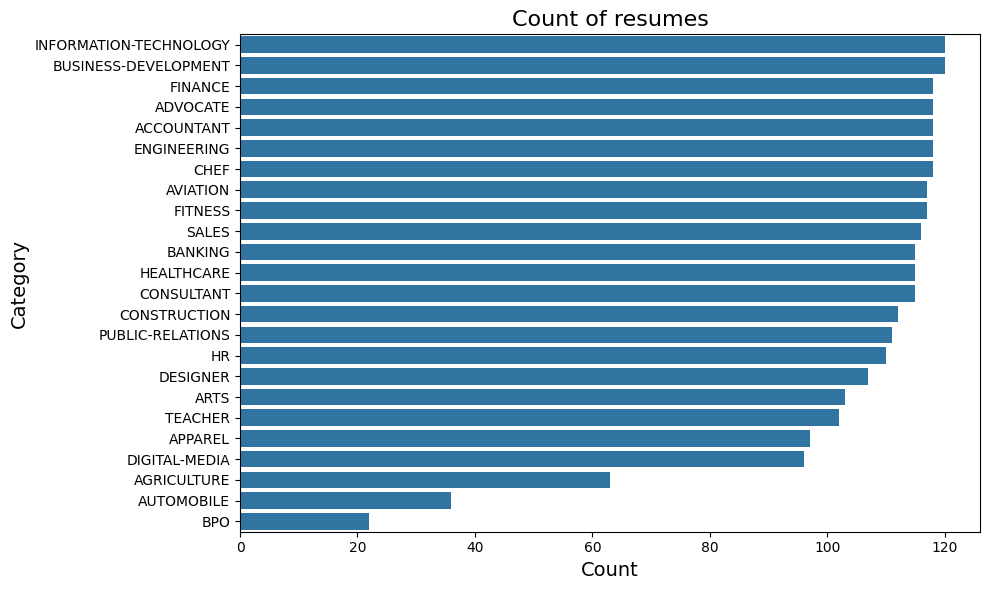

In [17]:
# Distribution of the resumes
plt.figure(figsize=(10,6))
sns.countplot(data=resumes, y='category', order=resumes['category'].value_counts().index)
plt.title('Count of resumes', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.tight_layout()
plt.show()



C:\Users\Esther\AppData\Local\Temp\ipykernel_15304\2837438020.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=salary_by_category, x='salary_avg', y='category', palette='viridis')


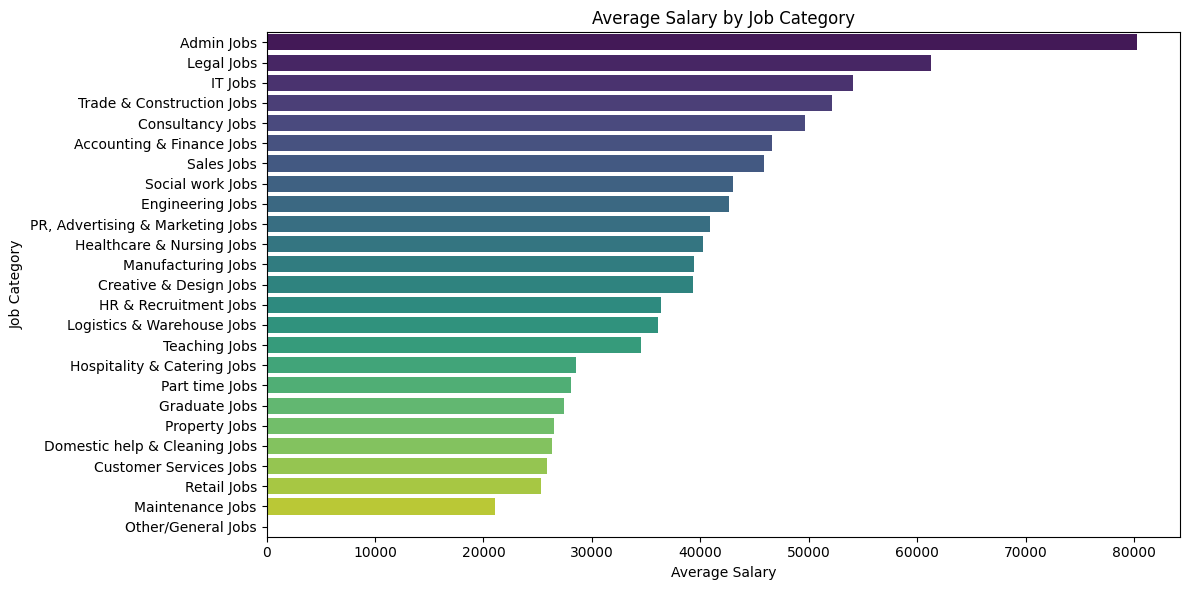

In [18]:
# Create a DataFrame from the Series
salary_by_category = jobs_gb_clean.groupby('category')['salary_avg'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=salary_by_category, x='salary_avg', y='category', palette='viridis')

plt.title('Average Salary by Job Category')
plt.xlabel('Average Salary')
plt.ylabel('Job Category')
plt.tight_layout()
plt.show()

C:\Users\Esther\AppData\Local\Temp\ipykernel_15304\119305233.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  job_trend = jobs_gb_clean.groupby(jobs_gb_clean['created'].dt.to_period('M')).size()


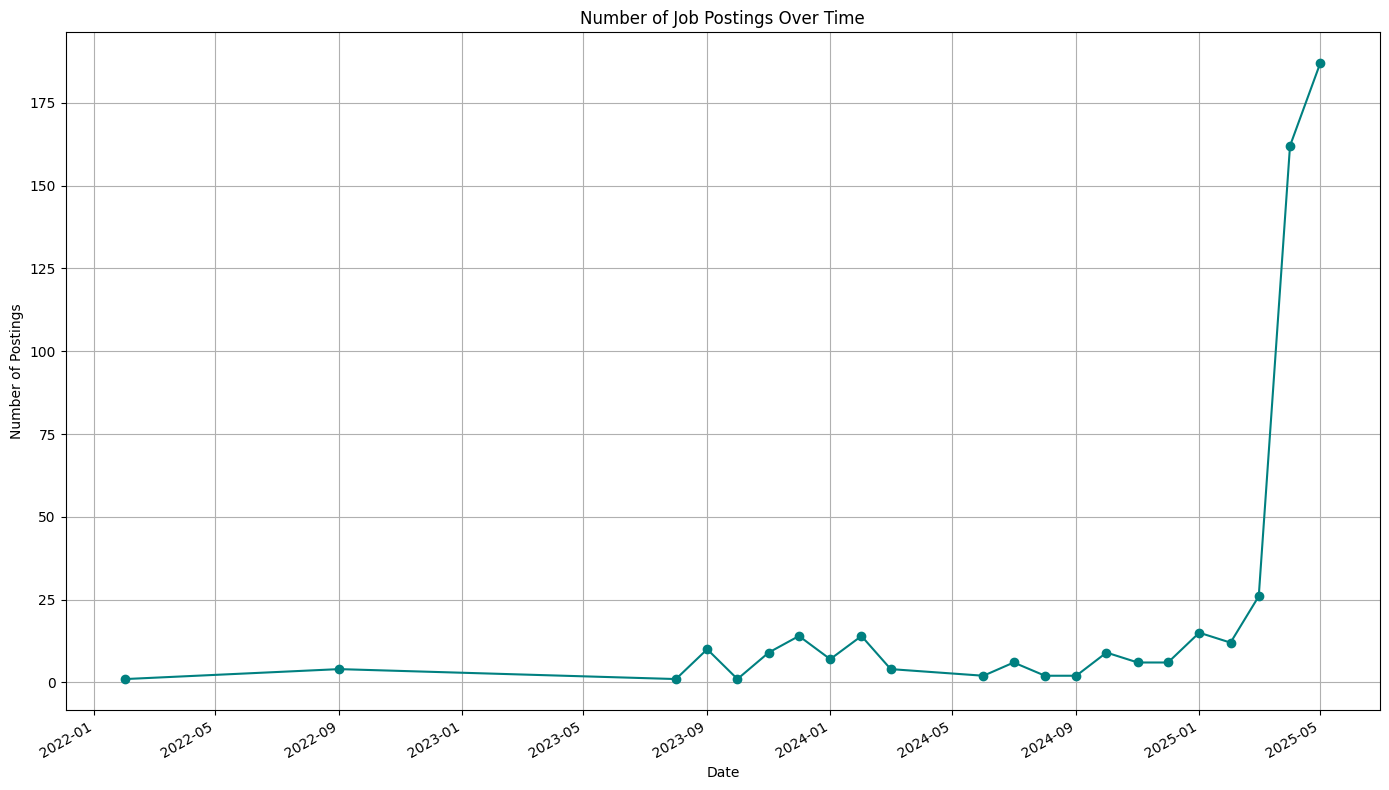

In [8]:
# Convert the created datatype to datetime
jobs_gb_clean['created'] = pd.to_datetime(jobs_gb_clean['created'], errors='coerce')

# Group by month
job_trend = jobs_gb_clean.groupby(jobs_gb_clean['created'].dt.to_period('M')).size()
job_trend.index = job_trend.index.to_timestamp()  # convert PeriodIndex to datetime

plt.figure(figsize=(14, 8))
job_trend.plot(marker='o', color='teal')

plt.title('Number of Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Postings')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
df = pd.read_csv('job vacancies in the uk.csv')
df.tail(10)

,Period,Thousands
219,Apr to June 2024,868
220,May to July 2024,859
221,June to Aug 2024,845
222,July to Sept 2024,832
223,Aug to Oct 2024,823
224,Sept to Nov 2024,807
225,Oct to Dec 2024,806
226,Nov to Jan 2025,803
227,Dec to Feb 2025,799
228,Jan to Mar 2025,781


In [10]:
# Correct the assignment from extract to individual columns
date_parts = df['Period'].str.extract(r'(?P<StartMonth>\w+)\s+to\s+\w+\s+(?P<Year>\d{4})')

# Combine into a single datetime column
df['Date'] = pd.to_datetime(date_parts['StartMonth'] + ' ' + date_parts['Year'], format='%b %Y', errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# Filter data from Jan 2022 to May 2025
start_date = '2022-01-01'
end_date = '2025-05-31'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Sort by date
df_filtered = df_filtered.sort_values('Date')

df.head()


,Period,Thousands,Date
0,Jan to Mar 2006,600,2006-01-01
1,Feb to Apr 2006,597,2006-02-01
2,Mar to May 2006,597,2006-03-01
3,Apr to June 2006,604,2006-04-01
4,May to July 2006,607,2006-05-01


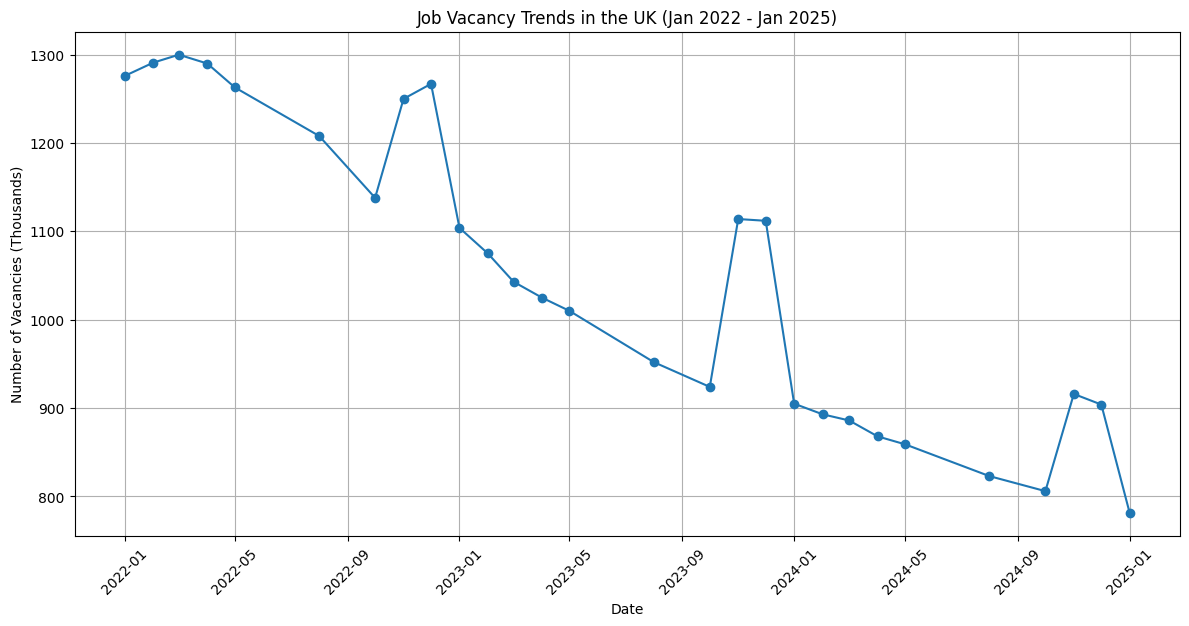

In [12]:
# Plot of job vacancies/postings in the UK
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Date'], df_filtered['Thousands'], marker='o')
plt.title('Job Vacancy Trends in the UK (Jan 2022 - Jan 2025)')
plt.xlabel('Date')
plt.ylabel('Number of Vacancies (Thousands)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()